# Loading of Datasets

Based on the preprocessing conducted, we have selected the following datasets to conduct an evaluation to determine which dataset will be used before performing hyperparameter tuning on our desired dataset.

The datasets that we have chosen are:
- `noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl`: Non-Cir (Standard Scaled after feature selection) with CIR Statistical Measures (PCA and Standard Scaled)
- `noncir_ss_scaled_trimmed_cir_ss_scaled.pkl`: Non-CIR (Standard Scaled after feature selection) with CIR Statistical Measures (Standard Scaled)
- `noncir_ss_scaled_trimmed_cir_pca.pkl`: Non-CIR (Standard Scaled after feature selection) with CIR Statistical Measures (PCA)

The datasets will be loaded into `dataset_1`, `dataset_2`, `dataset_3` respectively.

In [1]:
from utils import *
import pandas as pd
import numpy as np

dataset_1 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl")
dataset_2 = load_from_pickle("noncir_ss_scaled_trimmed_cir_ss_scaled.pkl")
dataset_3 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca.pkl")

# Random Forest (RF)

Summary

Given the results, the configuration that we have chosen is the model with Dataset 1 which has a max depth of 10 and the Gini criterion. Despite Dataset 1 and 3 showing similar results, Dataset 1 was chosen for both the SVM and MLP classifiers as such, to ensure a fair comparison between the classifiers during the evaluation between classifiers in the next section, we have selected Dataset 1. 

## Dataset 1 (noncir_ss_scaled_trimmed_cir_pca_ss_scaled)

Evaluation of the performance of `dataset_1`. With a 70:30 training and test split

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Select the features to be used for Support Vector Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Hyperparameter Tuning for MLPClassifier

The hyperparameter tuning helps to test all the various combinations that we have defined within the parameter space and provides the parameters that provides the most optimal results.

To determine the most optimal parameters for the MLP Classifier, we will conduct Hyperparameter tuning of the `max_depth` parameter and the `criterion` parameter.

The following are the parameters that we will define within our MLP Classifier:
- `max_depth`
    - Determines the maximum depth of the tree.
- `criterion`
    - Function to measure the quality of the split.
        - `gini` Gini impurity
        - `entropy` Entropy impurity

In [3]:
MAX_DEPTH = [2, 3, 4, 5, 7, 10, 12, 14, 15, 19, 20, 25, 30, 45, 50, 60, 70, 80, 90, 100]
PURITY_MEASURE = ['entropy', 'gini']

entropy_training_accuracy = []
entropy_testing_accuracy = []
for max_depth in MAX_DEPTH:
    clf = RandomForestClassifier(max_depth = max_depth, criterion = PURITY_MEASURE[0], random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    entropy_training_accuracy.append(accuracy_score(y_train, y_train_pred))
    entropy_testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Max Depth: ", max_depth)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("\n")



gini_training_accuracy = []
gini_testing_accuracy = []
for max_depth in MAX_DEPTH:
    clf2 = RandomForestClassifier(max_depth = max_depth, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)
    clf2.fit(x_train, y_train)
    y_train_pred = clf2.predict(x_train)
    y_test_pred = clf2.predict(x_test)
    gini_training_accuracy.append(accuracy_score(y_train, y_train_pred))
    gini_testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Max Depth: ", max_depth)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("\n")

Max Depth:  2
Training Accuracy:  0.8535034013605443
Testing Accuracy:  0.8415873015873016


Max Depth:  3
Training Accuracy:  0.86
Testing Accuracy:  0.8473809523809523


Max Depth:  4
Training Accuracy:  0.870578231292517
Testing Accuracy:  0.8603968253968254


Max Depth:  5
Training Accuracy:  0.8766326530612245
Testing Accuracy:  0.8646031746031746


Max Depth:  7
Training Accuracy:  0.8953401360544218
Testing Accuracy:  0.8813492063492063


Max Depth:  10
Training Accuracy:  0.9167687074829932
Testing Accuracy:  0.8890476190476191


Max Depth:  12
Training Accuracy:  0.9387414965986395
Testing Accuracy:  0.8947619047619048


Max Depth:  14
Training Accuracy:  0.9617346938775511
Testing Accuracy:  0.900079365079365


Max Depth:  15
Training Accuracy:  0.9729931972789115
Testing Accuracy:  0.900952380952381


Max Depth:  19
Training Accuracy:  0.9957482993197279
Testing Accuracy:  0.906984126984127


Max Depth:  20
Training Accuracy:  0.9982312925170068
Testing Accuracy:  0.90507936

### Training vs Testing Accuracy Graph

Based on the 2 graphs to compare between the compare of Entropy and Gini purity measure, we can derive on the specific optimised parameter for max_depth for both purity measures. As such, for Entropy, the max_depth that we have chosen is 10 as after the initial knee point within the first few depths, the testing accuracy can to a gradual increase before hovering around the 90% range whilst the training accuracy continued to show a drastic increase to almost 100% after `max_depth = 14`, suggesting an overfitting of the classifier.

For the Gini purity measure, a similar result is also shown where the training accuracy showed a drastic increase as the max_depth increases whilst the testing accuracy remained around the 90% range after `max_depth = 12`.

By selecting an optimal max_depth, we are able to prevent overfitting from a high max_depth and underfitting from a low max_depth.

The optimal parameter for the Random Forest Classifier using Entropy with Dataset 1 is:
- `max_depth`: `10`

The optimal parameter for the Random Forest Classifier using Gini with Dataset 1 is:
- `max_depth`: `10`

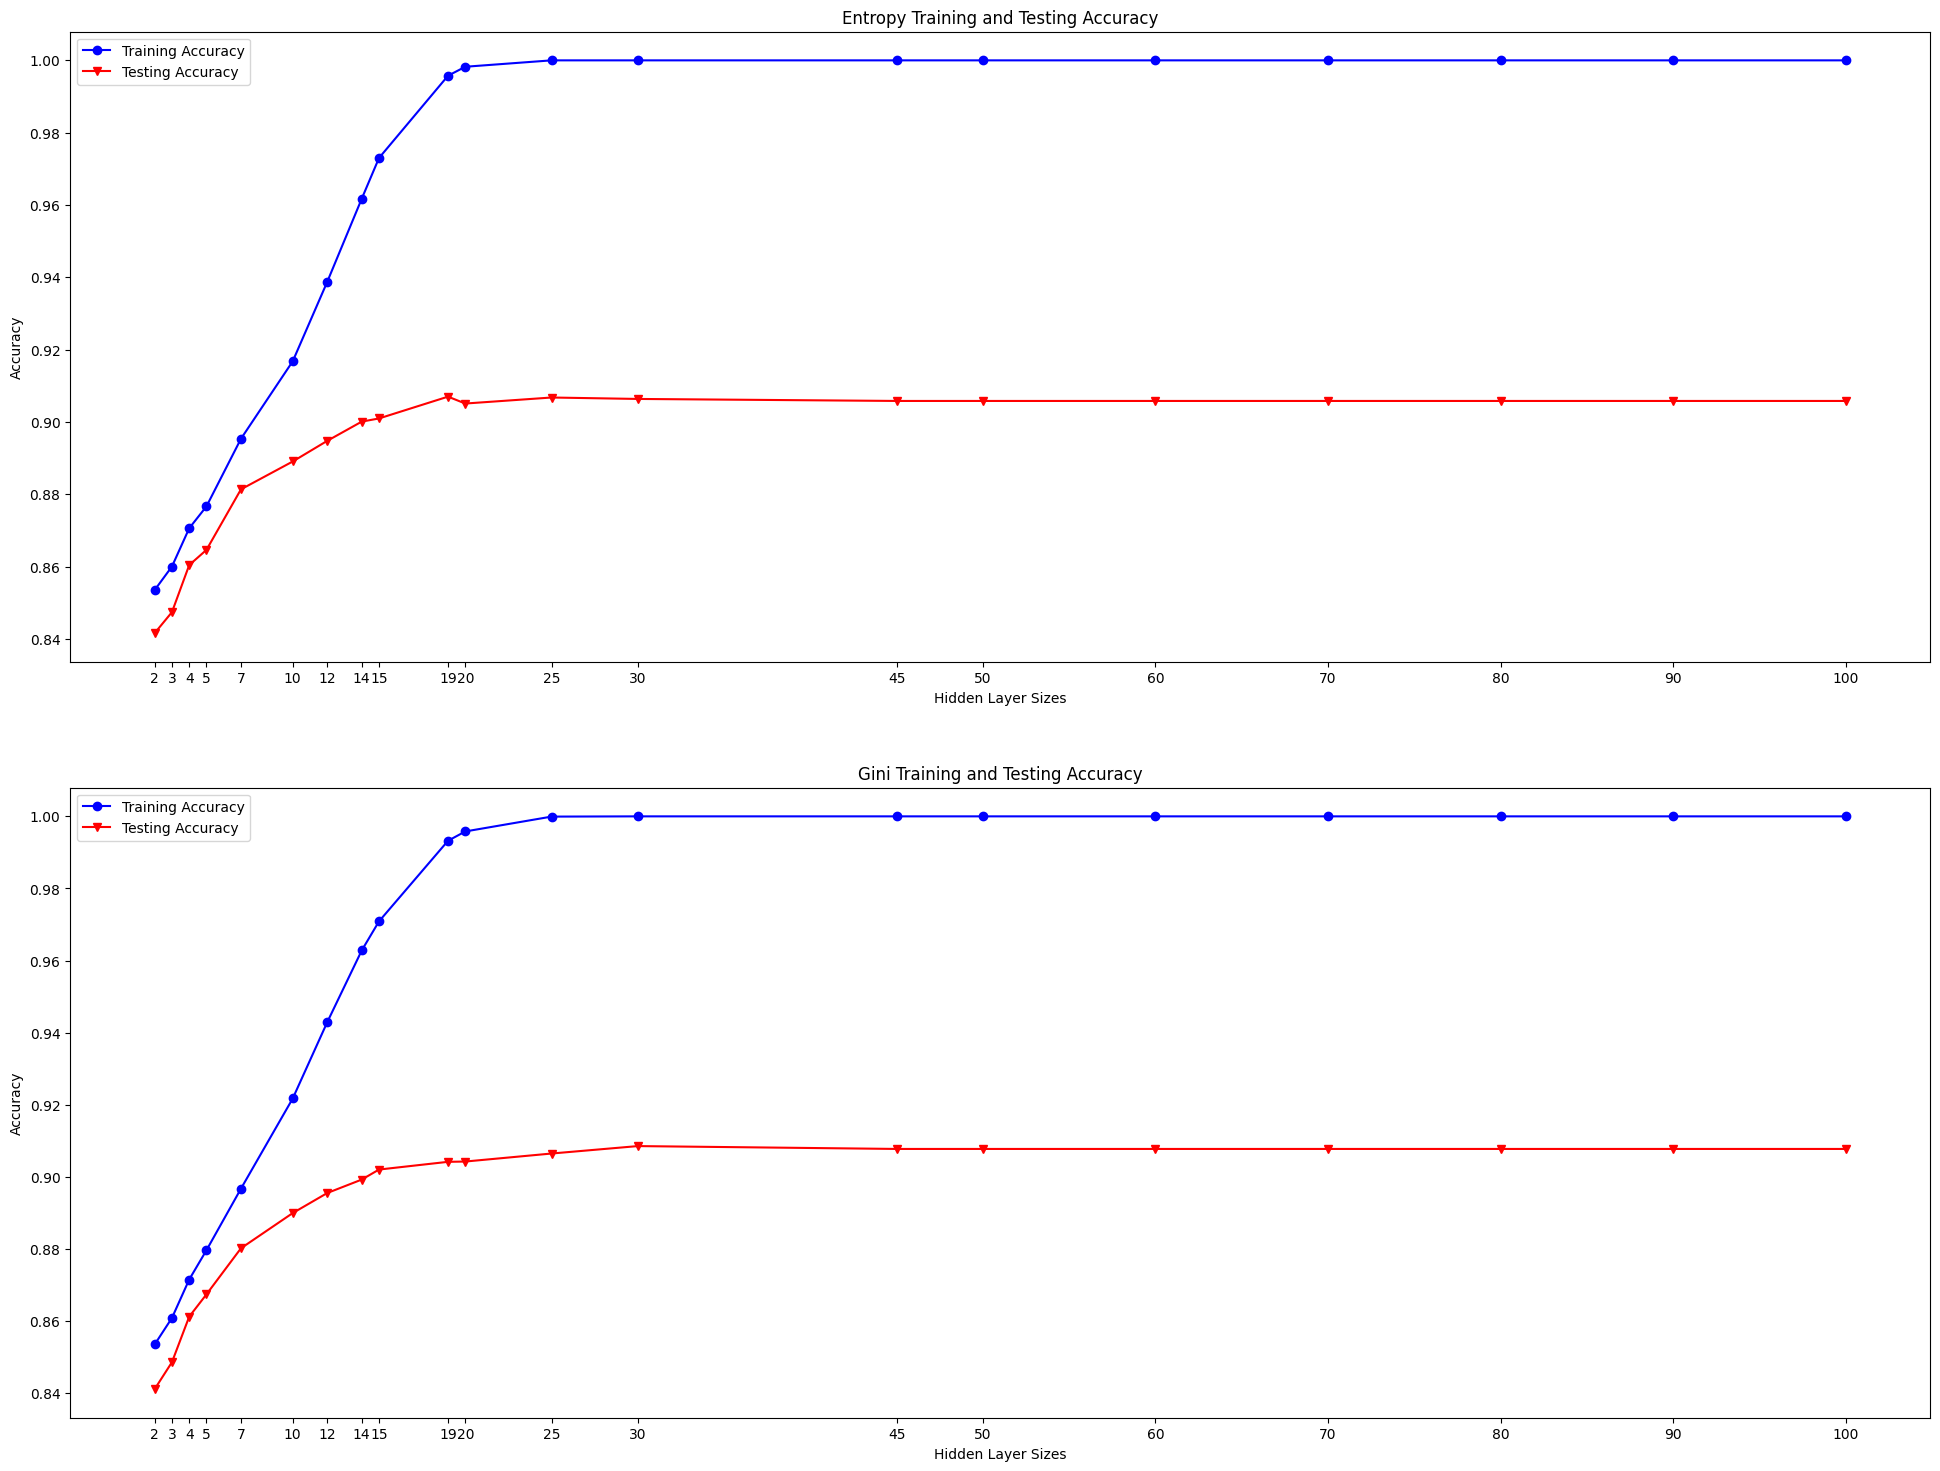

In [4]:
fig, axis = plt.subplots(2, figsize = (24, 18))

axis[0].plot(MAX_DEPTH, entropy_training_accuracy, color = 'blue', marker = 'o')
axis[0].plot(MAX_DEPTH, entropy_testing_accuracy, color = 'red', marker = 'v')
axis[0].legend(['Training Accuracy', 'Testing Accuracy'])
axis[0].set_xticks(MAX_DEPTH)
axis[0].set_ylabel('Accuracy')
axis[0].set_xlabel('Hidden Layer Sizes')
axis[0].set_title("Entropy Training and Testing Accuracy")

axis[1].plot(MAX_DEPTH, gini_training_accuracy, color = 'blue', marker = 'o')
axis[1].plot(MAX_DEPTH, gini_testing_accuracy, color = 'red', marker = 'v')
axis[1].legend(['Training Accuracy', 'Testing Accuracy'])
axis[1].set_ylabel('Accuracy')
axis[1].set_xticks(MAX_DEPTH)
axis[1].set_xlabel('Hidden Layer Sizes')
axis[1].set_title("Gini Training and Testing Accuracy")
plt.show()

In [35]:
clf = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[0], random_state = RANDOM_STATE)
clf.fit(x_train, y_train)
entropy_y_train_pred = clf.predict(x_train)
entropy_y_test_pred = clf.predict(x_test)
entropy_training_accuracy = accuracy_score(y_train, entropy_y_train_pred)
entropy_testing_accuracy = accuracy_score(y_test, entropy_y_test_pred)
print("Max Depth: ", 10)
print("Training Accuracy: ", accuracy_score(y_train, entropy_y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, entropy_y_test_pred))
print("\n")



clf2 = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)
clf2.fit(x_train, y_train)
gini_y_train_pred = clf2.predict(x_train)
gini_y_test_pred = clf2.predict(x_test)
gini_training_accuracy = accuracy_score(y_train, gini_y_train_pred)
gini_testing_accuracy = accuracy_score(y_test, gini_y_test_pred)
print("Max Depth: ", 10)
print("Training Accuracy: ", accuracy_score(y_train, gini_y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, gini_y_test_pred))
print("\n")

Max Depth:  10
Training Accuracy:  0.9167687074829932
Testing Accuracy:  0.8890476190476191


Max Depth:  10
Training Accuracy:  0.9217687074829932
Testing Accuracy:  0.89




### Classifier Metrics for Testing Dataset for both Entropy and Gini (Dataset 1)

Based on the classification metrics, both purity measures showed drastically similar results which shows that the purity measure did not have a signficiant affect on the performance of the classifier. As shown in the F1-Score to evaluate the prediction performance of the classifier, both models showed an F1-Score of 89% with the Gini purity measure showing a slight improvement of 0.1% as compared to the Entropy purity measure. Additionally, the reasonn for the 0.1% improvement between the Entropy and Gini purity measure could also be seen in the Confusion Matrix, where the Gini purity measure was able to predict more NLOS correctly as compared to the Entropy purity measure.

As such, the optimised parametes that will be chosenn for Dataset 1 are:
- `max_depth`: `10`
- `criterion`: `gini`

In [36]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), entropy_y_test_pred, print_results = True)


Accuracy: 0.8890476190476191
Precision: 0.8916309720635205
Recall: 0.889590869463499
F1 Score: 0.8889466105477646
Mean Squared Error (MSE): 0.4438095238095238
Matthews Correlation Coefficient (MCC): 0.7812191777345515
Cohen's Kappa: 0.7783068436265068
Hamming Loss: 0.11095238095238096

Confusion Matrix:
 [[5791  427]
 [ 971 5411]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.93      0.89      6218
         1.0       0.93      0.85      0.89      6382

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600





In [37]:
results = classifier_metrics(list(y_test), gini_y_test_pred, print_results = True)

Accuracy: 0.89
Precision: 0.8923880194768727
Recall: 0.8905227481723031
F1 Score: 0.8899101307189543
Mean Squared Error (MSE): 0.44
Matthews Correlation Coefficient (MCC): 0.7829085456577812
Cohen's Kappa: 0.7802007156780288
Hamming Loss: 0.11

Confusion Matrix:
 [[5787  431]
 [ 955 5427]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.93      0.89      6218
         1.0       0.93      0.85      0.89      6382

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600





#### Creating and Saving Optimal Model for Dataset 1 Random Forest Classifier

The optimal parameters for the Random Forest Classifier model for Dataset 2 are used and saved as a pickle file known as `rf_70_30_dataset_1.pkl`.

In [ ]:
clf = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

save_to_pickle(f'{MODEL_FOLDER}/rf_70_30_dataset_1.pkl', clf, complete_path=False)

#### Confusion Matrix for Testing Dataset for Entropy (Dataset 1)


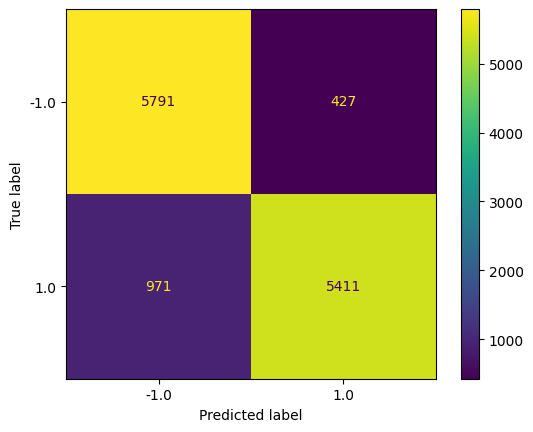

In [38]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset for Gini (Dataset 1)


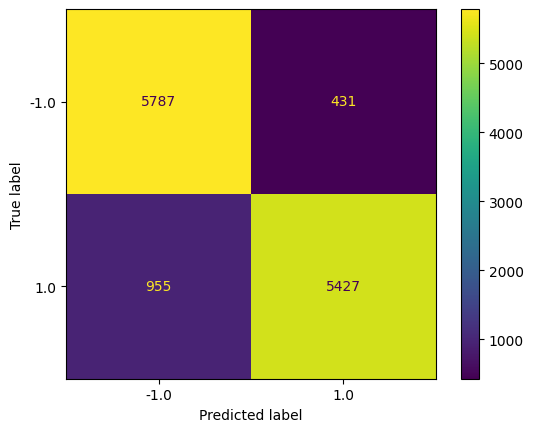

In [39]:
predictions = clf2.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

## Dataset_2 (noncir_ss_scaled_trimmed_cir_ss_scaled)

Evaluation of the performance of `dataset_2`. With a 70:30 training and test split

In [10]:
# Select the features to be used for Support Vector Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Hyperparameter Tuning for MLPClassifier

The hyperparameter tuning helps to test all the various combinations that we have defined within the parameter space and provides the parameters that provides the most optimal results.

To determine the most optimal parameters for the MLP Classifier, we will conduct Hyperparameter tuning of the `max_depth` parameter and the `criterion` parameter.

The following are the parameters that we will define within our MLP Classifier:
- `max_depth`
    - Determines the maximum depth of the tree.
- `criterion`
    - Function to measure the quality of the split.
        - `gini` Gini impurity
        - `entropy` Entropy impurity

In [11]:
MAX_DEPTH = [2, 3, 4, 5, 7, 10, 12, 14, 15, 19, 20, 25, 30, 45, 50, 60, 70, 80, 90, 100]
PURITY_MEASURE = ['entropy', 'gini']

entropy_training_accuracy = []
entropy_testing_accuracy = []
for max_depth in MAX_DEPTH:
    clf = RandomForestClassifier(max_depth = max_depth, criterion = PURITY_MEASURE[0], random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    entropy_training_accuracy.append(accuracy_score(y_train, y_train_pred))
    entropy_testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Max Depth: ", max_depth)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("\n")



gini_training_accuracy = []
gini_testing_accuracy = []
for max_depth in MAX_DEPTH:
    clf2 = RandomForestClassifier(max_depth = max_depth, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)
    clf2.fit(x_train, y_train)
    y_train_pred = clf2.predict(x_train)
    y_test_pred = clf2.predict(x_test)
    gini_training_accuracy.append(accuracy_score(y_train, y_train_pred))
    gini_testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Max Depth: ", max_depth)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("\n")

Max Depth:  2
Training Accuracy:  0.8487074829931973
Testing Accuracy:  0.8332539682539682


Max Depth:  3
Training Accuracy:  0.8528231292517007
Testing Accuracy:  0.837936507936508


Max Depth:  4
Training Accuracy:  0.8593877551020408
Testing Accuracy:  0.8459523809523809


Max Depth:  5
Training Accuracy:  0.866904761904762
Testing Accuracy:  0.8523809523809524


Max Depth:  7
Training Accuracy:  0.8759863945578231
Testing Accuracy:  0.8570634920634921


Max Depth:  10
Training Accuracy:  0.9005102040816326
Testing Accuracy:  0.8649206349206349


Max Depth:  12
Training Accuracy:  0.9238435374149659
Testing Accuracy:  0.8664285714285714


Max Depth:  14
Training Accuracy:  0.9417687074829932
Testing Accuracy:  0.8687301587301587


Max Depth:  15
Training Accuracy:  0.947687074829932
Testing Accuracy:  0.8697619047619047


Max Depth:  19
Training Accuracy:  0.9641156462585034
Testing Accuracy:  0.87


Max Depth:  20
Training Accuracy:  0.9703741496598639
Testing Accuracy:  0.8720634

### Training vs Testing Accuracy Graph

Based on the 2 graphs to compare between the compare of Entropy and Gini purity measure, we can derive on the specific optimised parameter for max_depth for both purity measures. As such, for Entropy, the max_depth that we have chosen is 10 as after the initial knee point within the first few depths, the testing accuracy can to a gradual increase before hovering around the 86% range whilst the training accuracy continued to show a drastic increase to over 90% - 95% after `max_depth = 10`, suggesting an overfitting of the classifier.

For the Gini purity measure, a similar result is also shown where the training accuracy showed a drastic increase as the max_depth increases whilst the testing accuracy remained around the 86% range after `max_depth = 10`.

By selecting an optimal max_depth, we are able to prevent overfitting from a high max_depth and underfitting from a low max_depth.

The optimal parameter for the Random Forest Classifier using Entropy with Dataset 1 is:
- `max_depth`: `10`

The optimal parameter for the Random Forest Classifier using Gini with Dataset 1 is:
- `max_depth`: `10`

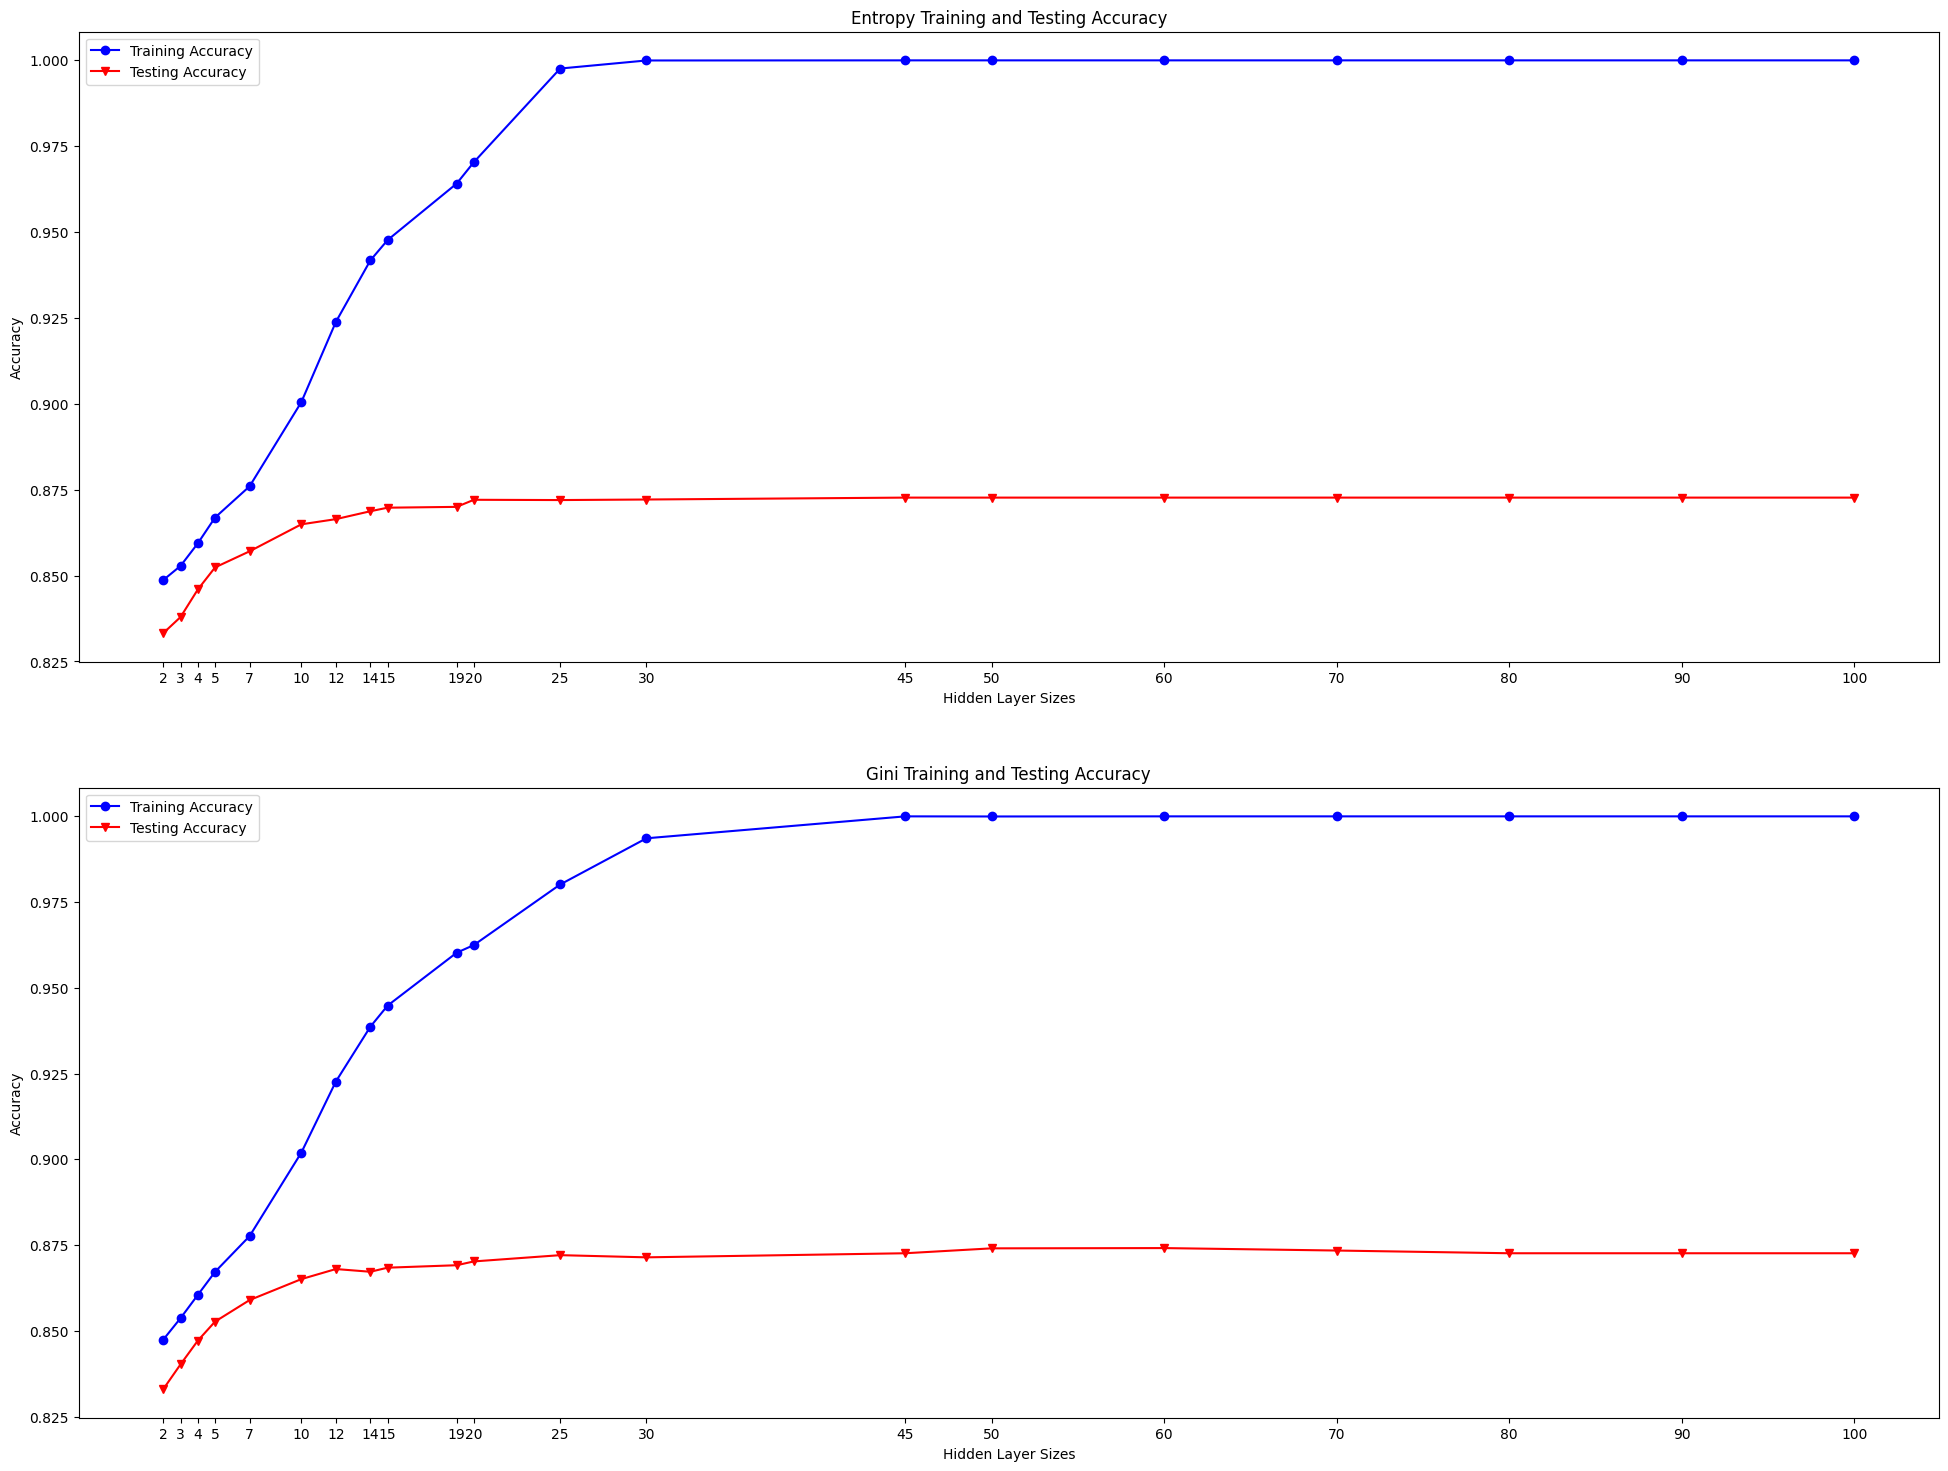

In [12]:
fig, axis = plt.subplots(2, figsize = (24, 18))

axis[0].plot(MAX_DEPTH, entropy_training_accuracy, color = 'blue', marker = 'o')
axis[0].plot(MAX_DEPTH, entropy_testing_accuracy, color = 'red', marker = 'v')
axis[0].legend(['Training Accuracy', 'Testing Accuracy'])
axis[0].set_xticks(MAX_DEPTH)
axis[0].set_ylabel('Accuracy')
axis[0].set_xlabel('Hidden Layer Sizes')
axis[0].set_title("Entropy Training and Testing Accuracy")

axis[1].plot(MAX_DEPTH, gini_training_accuracy, color = 'blue', marker = 'o')
axis[1].plot(MAX_DEPTH, gini_testing_accuracy, color = 'red', marker = 'v')
axis[1].legend(['Training Accuracy', 'Testing Accuracy'])
axis[1].set_ylabel('Accuracy')
axis[1].set_xticks(MAX_DEPTH)
axis[1].set_xlabel('Hidden Layer Sizes')
axis[1].set_title("Gini Training and Testing Accuracy")
plt.show()

In [14]:
clf = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[0], random_state = RANDOM_STATE)
clf.fit(x_train, y_train)
entropy_y_train_pred = clf.predict(x_train)
entropy_y_test_pred = clf.predict(x_test)
entropy_training_accuracy = accuracy_score(y_train, entropy_y_train_pred)
entropy_testing_accuracy = accuracy_score(y_test, entropy_y_test_pred)
print("Max Depth: ", 10)
print("Training Accuracy: ", accuracy_score(y_train, entropy_y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, entropy_y_test_pred))
print("\n")



clf2 = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)
clf2.fit(x_train, y_train)
gini_y_train_pred = clf2.predict(x_train)
gini_y_test_pred = clf2.predict(x_test)
gini_training_accuracy = accuracy_score(y_train, gini_y_train_pred)
gini_testing_accuracy = accuracy_score(y_test, gini_y_test_pred)
print("Max Depth: ", 10)
print("Training Accuracy: ", accuracy_score(y_train, gini_y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, gini_y_test_pred))
print("\n")

Max Depth:  10
Training Accuracy:  0.9005102040816326
Testing Accuracy:  0.8649206349206349


Max Depth:  10
Training Accuracy:  0.9019727891156463
Testing Accuracy:  0.8650793650793651




### Classifier Metrics for Testing Dataset for both Entropy and Gini (Dataset 2)

Based on the classification metrics, both purity measures showed drastically similar results, which is also similar to the results achieved from dataset 1, this shows that the purity measure did not have a signficiant affect on the performance of the classifier. As shown in the F1-Score to evaluate the prediction performance of the classifier, both models showed an F1-Score of 86%. However, within the Confusion Matrix, both the Entropy and Gini models had its fair share of wrongly predicted NLOS and LOS where the Gini impurity measure predicted more NLOS correctly whilst the Entropy impurity measure predicted more LOS correctly. As both models provided very similar results, the default value of the `criterion` parameter is chosen which is `gini`.

As such, the optimised parametes that will be chosenn for Dataset 1 are:
- `max_depth`: `10`
- `criterion`: `gini`

In [15]:
# Random Forest (Testing) Model Performance for the Testing Dataset for Dataset 2
results = classifier_metrics(list(y_test), entropy_y_test_pred, print_results = True)


Accuracy: 0.8649206349206349
Precision: 0.8715154128495028
Recall: 0.8657945478090066
F1 Score: 0.8644976244307753
Mean Squared Error (MSE): 0.5403174603174603
Matthews Correlation Coefficient (MCC): 0.7372877659295868
Cohen's Kappa: 0.730279265326057
Hamming Loss: 0.13507936507936508

Confusion Matrix:
 [[5801  417]
 [1285 5097]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.93      0.87      6218
         1.0       0.92      0.80      0.86      6382

    accuracy                           0.86     12600
   macro avg       0.87      0.87      0.86     12600
weighted avg       0.87      0.86      0.86     12600





In [16]:
results = classifier_metrics(list(y_test), gini_y_test_pred, print_results = True)

Accuracy: 0.8650793650793651
Precision: 0.8708718425396649
Recall: 0.8658995794601232
F1 Score: 0.8647171246444625
Mean Squared Error (MSE): 0.5396825396825397
Matthews Correlation Coefficient (MCC): 0.7367546436063078
Cohen's Kappa: 0.730567312033845
Hamming Loss: 0.1349206349206349

Confusion Matrix:
 [[5776  442]
 [1258 5124]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.93      0.87      6218
         1.0       0.92      0.80      0.86      6382

    accuracy                           0.87     12600
   macro avg       0.87      0.87      0.86     12600
weighted avg       0.87      0.87      0.86     12600





#### Confusion Matrix for Testing Dataset for Entropy (Dataset 2)

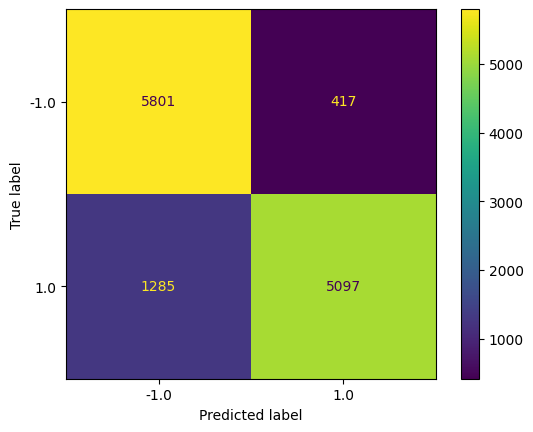

In [17]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset for Gini (Dataset 2)

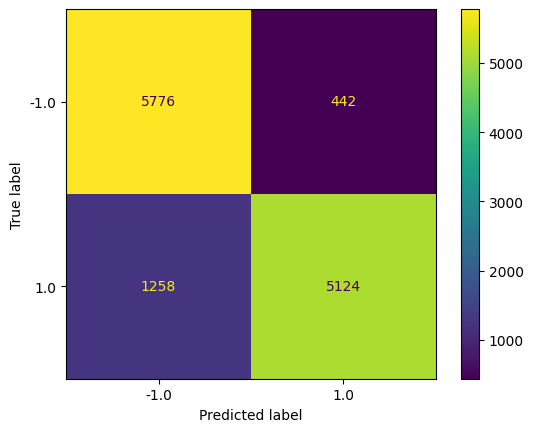

In [18]:
predictions = clf2.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Creating and Saving Optimal Model for Dataset 2 Random Forest Classifier

The optimal parameters for the Random Forest Classifier model for Dataset 2 are used and saved as a pickle file known as `rf_70_30_dataset_2.pkl`.

In [22]:
clf = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

save_to_pickle(f'{MODEL_FOLDER}/rf_70_30_dataset_2.pkl', clf, complete_path=False)

## Dataset_3 (noncir_ss_scaled_trimmed_cir_pca)

Evaluation of the performance of `dataset_3`. With a 70:30 training and test split

In [23]:
# Select the features to be used for Support Vector Classification
X = dataset_3.drop(columns = 'NLOS')
Y = dataset_3[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Hyperparameter Tuning for MLPClassifier

The hyperparameter tuning helps to test all the various combinations that we have defined within the parameter space and provides the parameters that provides the most optimal results.

To determine the most optimal parameters for the MLP Classifier, we will conduct Hyperparameter tuning of the `max_depth` parameter and the `criterion` parameter.

The following are the parameters that we will define within our MLP Classifier:
- `max_depth`
    - Determines the maximum depth of the tree.
- `criterion`
    - Function to measure the quality of the split.
        - `gini` Gini impurity
        - `entropy` Entropy impurity

In [24]:
MAX_DEPTH = [2, 3, 4, 5, 7, 10, 12, 14, 15, 19, 20, 25, 30, 45, 50, 60, 70, 80, 90, 100]
PURITY_MEASURE = ['entropy', 'gini']

entropy_training_accuracy = []
entropy_testing_accuracy = []
for max_depth in MAX_DEPTH:
    clf = RandomForestClassifier(max_depth = max_depth, criterion = PURITY_MEASURE[0], random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    entropy_training_accuracy.append(accuracy_score(y_train, y_train_pred))
    entropy_testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Max Depth: ", max_depth)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("\n")



gini_training_accuracy = []
gini_testing_accuracy = []
for max_depth in MAX_DEPTH:
    clf2 = RandomForestClassifier(max_depth = max_depth, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)
    clf2.fit(x_train, y_train)
    y_train_pred = clf2.predict(x_train)
    y_test_pred = clf2.predict(x_test)
    gini_training_accuracy.append(accuracy_score(y_train, y_train_pred))
    gini_testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Max Depth: ", max_depth)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("\n")

Max Depth:  2
Training Accuracy:  0.8535034013605443
Testing Accuracy:  0.8415873015873016


Max Depth:  3
Training Accuracy:  0.86
Testing Accuracy:  0.8473809523809523


Max Depth:  4
Training Accuracy:  0.870578231292517
Testing Accuracy:  0.8603968253968254


Max Depth:  5
Training Accuracy:  0.8766326530612245
Testing Accuracy:  0.8646031746031746


Max Depth:  7
Training Accuracy:  0.8953401360544218
Testing Accuracy:  0.8813492063492063


Max Depth:  10
Training Accuracy:  0.9167687074829932
Testing Accuracy:  0.8890476190476191


Max Depth:  12
Training Accuracy:  0.9387414965986395
Testing Accuracy:  0.8947619047619048


Max Depth:  14
Training Accuracy:  0.9617346938775511
Testing Accuracy:  0.900079365079365


Max Depth:  15
Training Accuracy:  0.9729931972789115
Testing Accuracy:  0.900952380952381


Max Depth:  19
Training Accuracy:  0.9957482993197279
Testing Accuracy:  0.906984126984127


Max Depth:  20
Training Accuracy:  0.9982312925170068
Testing Accuracy:  0.90507936

### Training vs Testing Accuracy Graph

Based on the 2 graphs to compare between the compare of Entropy and Gini purity measure, we can derive on the specific optimised parameter for max_depth for both purity measures. As such, for Entropy, the max_depth that we have chosen is 10 as after the initial knee point within the first few depths, the testing accuracy can to a gradual increase before hovering around the 91% range whilst the training accuracy continued to show a drastic increase to almost 100% after `max_depth = 19`, suggesting an overfitting of the classifier.

For the Gini purity measure, a similar result is also shown where the training accuracy showed a drastic increase as the max_depth increases whilst the testing accuracy remained around the 90% range after `max_depth = 12`.

By selecting an optimal max_depth, we are able to prevent overfitting from a high max_depth and underfitting from a low max_depth.

The optimal parameter for the Random Forest Classifier using Entropy with Dataset 3 is:
- `max_depth`: `10`

The optimal parameter for the Random Forest Classifier using Gini with Dataset 3 is:
- `max_depth`: `10`

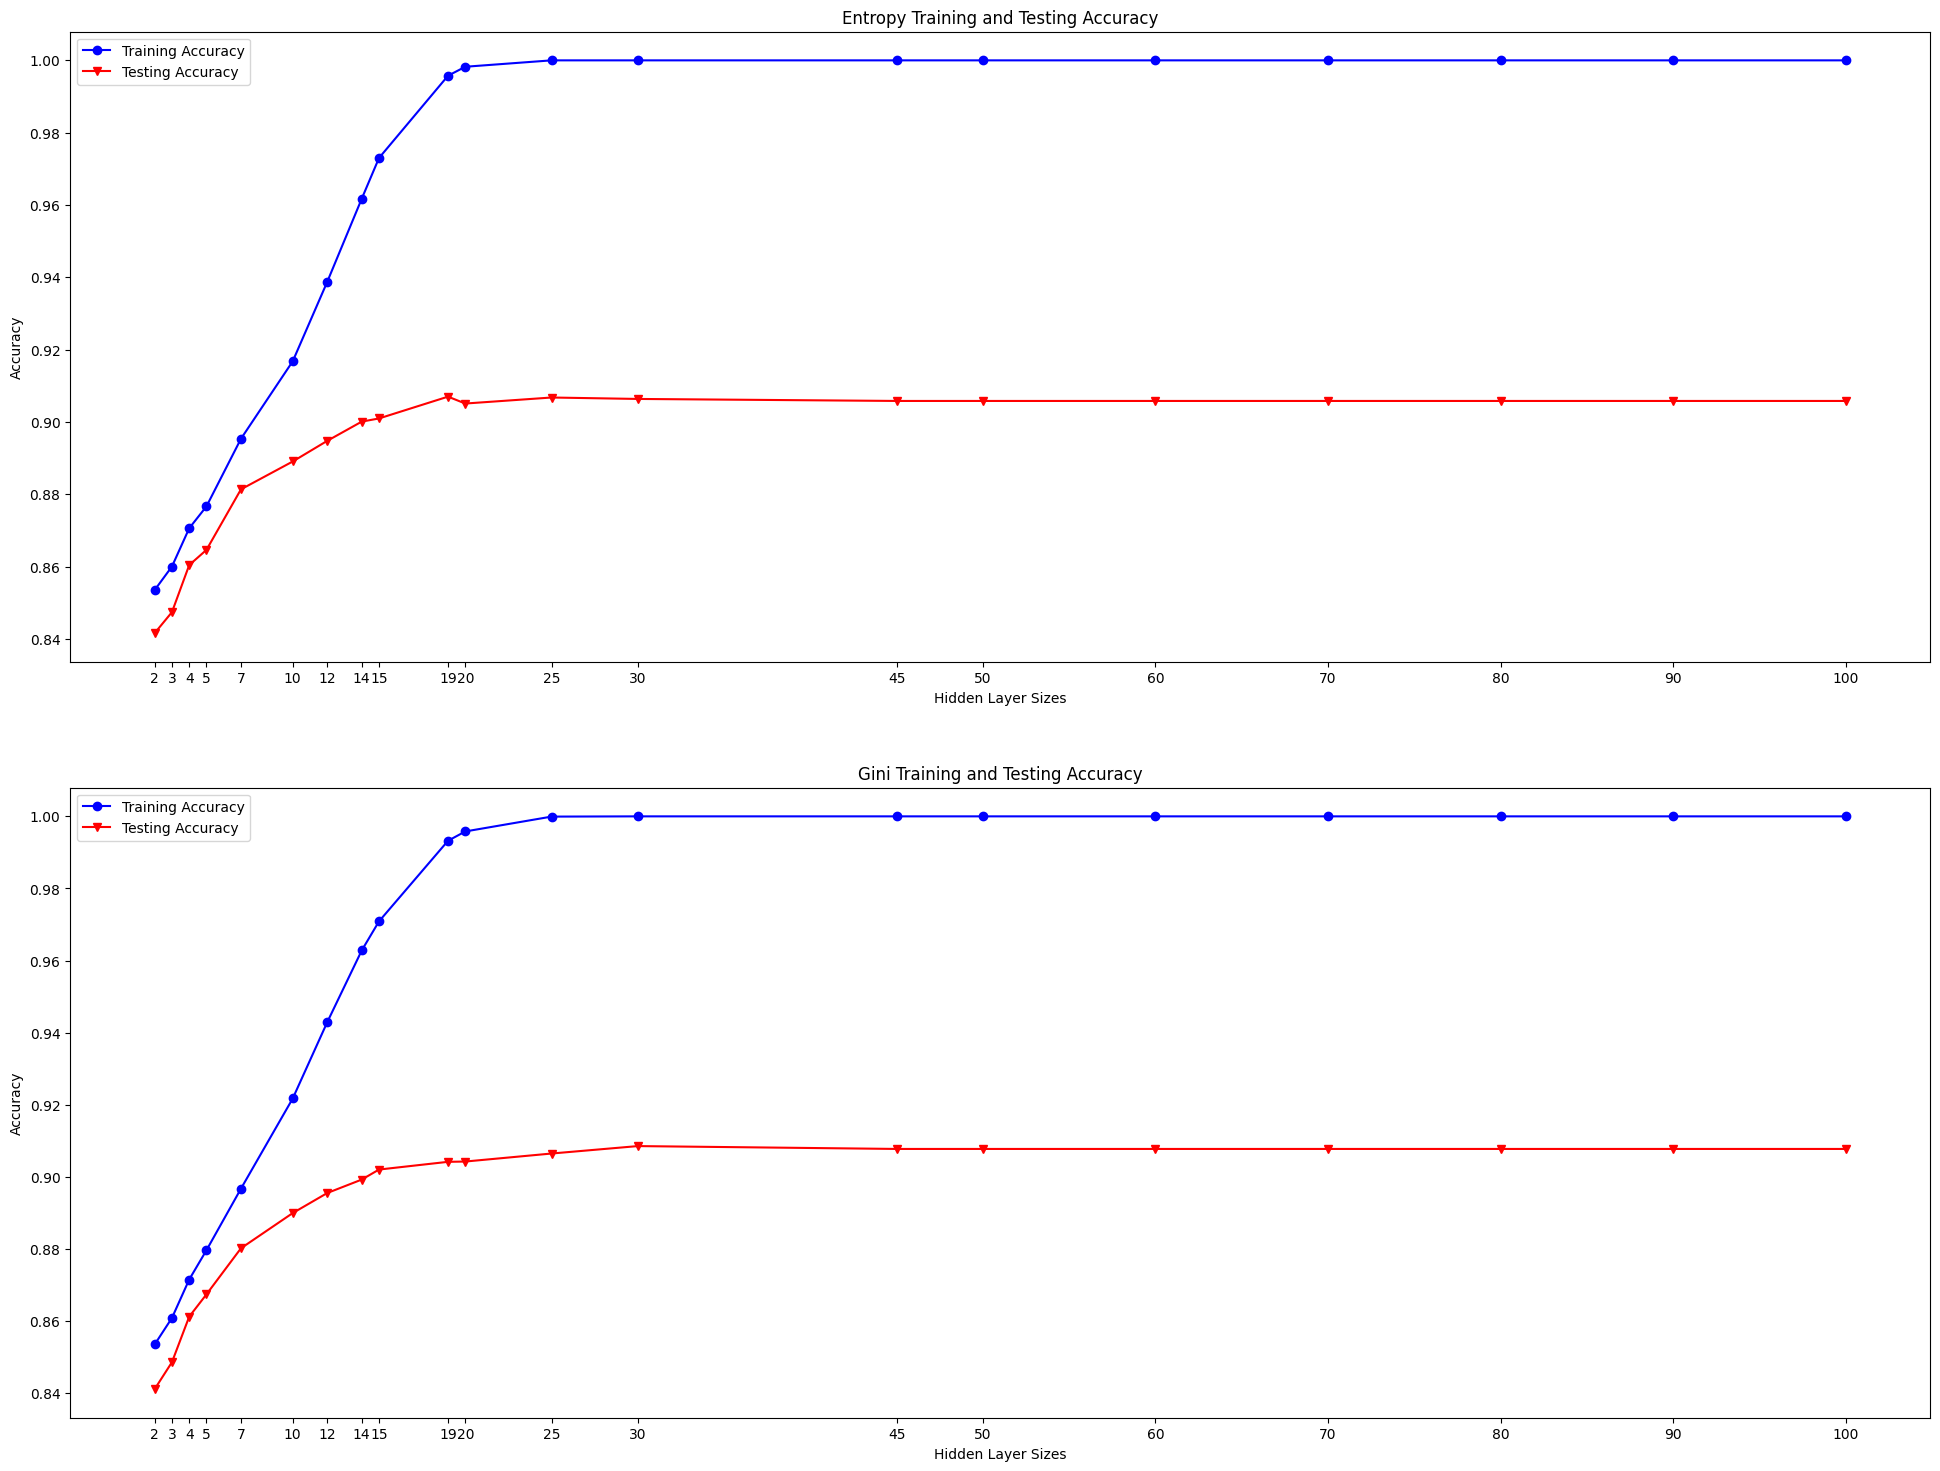

In [25]:
fig, axis = plt.subplots(2, figsize = (24, 18))

axis[0].plot(MAX_DEPTH, entropy_training_accuracy, color = 'blue', marker = 'o')
axis[0].plot(MAX_DEPTH, entropy_testing_accuracy, color = 'red', marker = 'v')
axis[0].legend(['Training Accuracy', 'Testing Accuracy'])
axis[0].set_xticks(MAX_DEPTH)
axis[0].set_ylabel('Accuracy')
axis[0].set_xlabel('Hidden Layer Sizes')
axis[0].set_title("Entropy Training and Testing Accuracy")

axis[1].plot(MAX_DEPTH, gini_training_accuracy, color = 'blue', marker = 'o')
axis[1].plot(MAX_DEPTH, gini_testing_accuracy, color = 'red', marker = 'v')
axis[1].legend(['Training Accuracy', 'Testing Accuracy'])
axis[1].set_ylabel('Accuracy')
axis[1].set_xticks(MAX_DEPTH)
axis[1].set_xlabel('Hidden Layer Sizes')
axis[1].set_title("Gini Training and Testing Accuracy")
plt.show()

In [26]:
clf = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[0], random_state = RANDOM_STATE)
clf.fit(x_train, y_train)
entropy_y_train_pred = clf.predict(x_train)
entropy_y_test_pred = clf.predict(x_test)
entropy_training_accuracy = accuracy_score(y_train, entropy_y_train_pred)
entropy_testing_accuracy = accuracy_score(y_test, entropy_y_test_pred)
print("Max Depth: ", 10)
print("Training Accuracy: ", accuracy_score(y_train, entropy_y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, entropy_y_test_pred))
print("\n")



clf2 = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)
clf2.fit(x_train, y_train)
gini_y_train_pred = clf2.predict(x_train)
gini_y_test_pred = clf2.predict(x_test)
gini_training_accuracy = accuracy_score(y_train, gini_y_train_pred)
gini_testing_accuracy = accuracy_score(y_test, gini_y_test_pred)
print("Max Depth: ", 10)
print("Training Accuracy: ", accuracy_score(y_train, gini_y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, gini_y_test_pred))
print("\n")

Max Depth:  10
Training Accuracy:  0.9167687074829932
Testing Accuracy:  0.8890476190476191


Max Depth:  10
Training Accuracy:  0.9217687074829932
Testing Accuracy:  0.89




### Classifier Metrics for Testing Dataset for both Entropy and Gini (Dataset 3)

Based on the classification metrics, both purity measures showed drastically similar results, which is also similar to the results achieved from dataset 1 and 2, this shows that the purity measure did not have a signficiant affect on the performance of the classifier. As shown in the F1-Score to evaluate the prediction performance of the classifier, both models showed an F1-Score of 88%. However, within the Confusion Matrix, both the Entropy and Gini models had its fair share of wrongly predicted NLOS and LOS where the Gini impurity measure predicted more NLOS correctly whilst the Entropy impurity measure predicted more LOS correctly. As both models provided very similar results, the default value of the `criterion` parameter is chosen which is `gini`.

As such, the optimised parametes that will be chosen for Dataset 3 are:
- `max_depth`: `10`
- `criterion`: `gini`

In [27]:
# Random Forest (Testing) Model Performance for the Testing Dataset for Dataset 3
results = classifier_metrics(list(y_test), entropy_y_test_pred, print_results = True)


Accuracy: 0.8890476190476191
Precision: 0.8916309720635205
Recall: 0.889590869463499
F1 Score: 0.8889466105477646
Mean Squared Error (MSE): 0.4438095238095238
Matthews Correlation Coefficient (MCC): 0.7812191777345515
Cohen's Kappa: 0.7783068436265068
Hamming Loss: 0.11095238095238096

Confusion Matrix:
 [[5791  427]
 [ 971 5411]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.93      0.89      6218
         1.0       0.93      0.85      0.89      6382

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600





In [28]:
results = classifier_metrics(list(y_test), gini_y_test_pred, print_results = True)

Accuracy: 0.89
Precision: 0.8923880194768727
Recall: 0.8905227481723031
F1 Score: 0.8899101307189543
Mean Squared Error (MSE): 0.44
Matthews Correlation Coefficient (MCC): 0.7829085456577812
Cohen's Kappa: 0.7802007156780288
Hamming Loss: 0.11

Confusion Matrix:
 [[5787  431]
 [ 955 5427]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.93      0.89      6218
         1.0       0.93      0.85      0.89      6382

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600





#### Confusion Matrix for Testing Dataset for Entropy (Dataset 3)

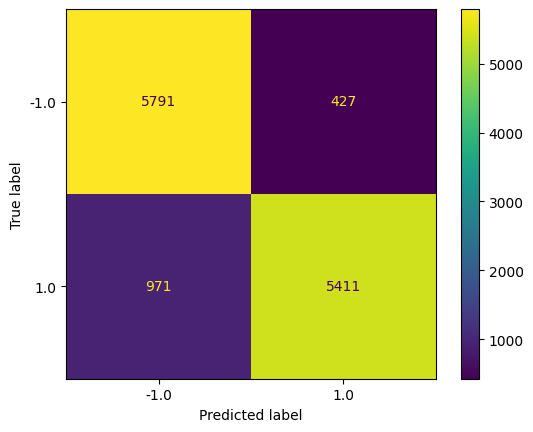

In [29]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset for Gini (Dataset 3)

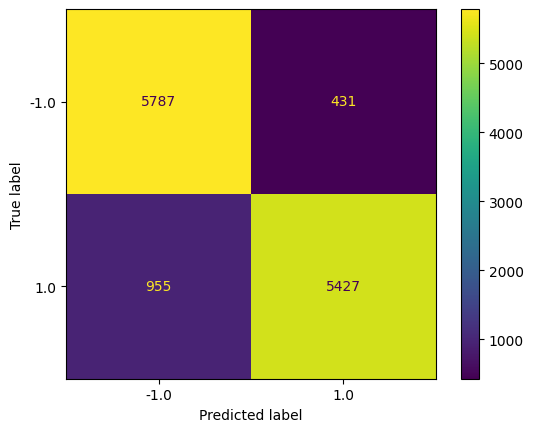

In [30]:
predictions = clf2.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Creating and Saving Optimal Model for Dataset 3 Random Forest Classifier

The optimal parameters for the Random Forest Classifier model for Dataset 3 are used and saved as a pickle file known as `rf_70_30_dataset_3.pkl`.

In [31]:
clf = RandomForestClassifier(max_depth = 10, criterion = PURITY_MEASURE[1], random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

save_to_pickle(f'{MODEL_FOLDER}/rf_70_30_dataset_3.pkl', clf, complete_path=False)